# Practical exemple: COVID Dataset
The content of this notebook is based on the work of Guillaume Saint-Cirgue from Machine Learnia (YouTube).

What will be see here:
- How to work on a real life dataset.
- How to explore a huge dataset (Shape and Background through a lot of visual representations).
- How to spot the relevant features.
- How to make our first assumptions regarding the target and how to test them.
## Import the relevant libraries

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set()

## Load the dataset

In [50]:
path = 'C://Users//foucardguimax//Desktop//PortFolio//Dataset.xlsx'
raw_data = pd.read_excel(path)
df = raw_data.copy()

In [51]:
pd.set_option('display.max_row', df.shape[1])
pd.set_option('display.max_columns', df.shape[1])

## Exploration of the dataset

#### Shape analysis of the dataset:
- **target variable**: SARS-Cov-2 exam result
- **general shape**:(5644, 111) there are a lot of columns in this dataset.
- **types of variables**: float64: 70 ;object: 37 ; int64 : 4
- **NaN values**: A lot of NaN. thecolumns with 76% of missing values comes from viral testing while the columns with 89% of missing values comes from blood testing.

#### Background analysis:
- **Target visualisation**: 10% of positive patients
- **Relevant variables**:
    - Continuous variables are standardized, some are skewed, some follow a normal distribution.
    - Age quantile is hard to interpret, there are no information about the way it is displayed.
    - Categorical variables are all binary. Rhinovirus has the highest proportion of positives.
- **Link features/target**
    - Target WRT Blood: From this analysis, we can see that the amount of Monocytes, Platelets, Leukocytes might be linked to Covid_19 --> We need to test this hypothesis
    - Target WRT Age: Cannot make any assumptions since we don't know how this feature works and when this dataset was created
    - Target/Viral: Few people got the covid and another virus. Case Rhinovirus/Enterovirus to be checked, a lot of people with this virus also got the covid. But for now, impossible to correlate the two.
- **NaN analysis**: viral: 1350 rows (92/8), blood 600 rows (87/13)

### Null hypothesis (H0):
H0 is rejected for some features: Platelets, Leukocytes, Monocytes etc...

In [52]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [53]:
df.shape

(5644, 111)

In [54]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

In [55]:
(df.isna().sum()/df.shape[0]).sort_values()

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

There are a lot of missing values in this dataset, let's make a visual representation of the dataset missing values using seaborn.

Text(0.5, 1.0, 'Visual representation of the missing values in the dataset')

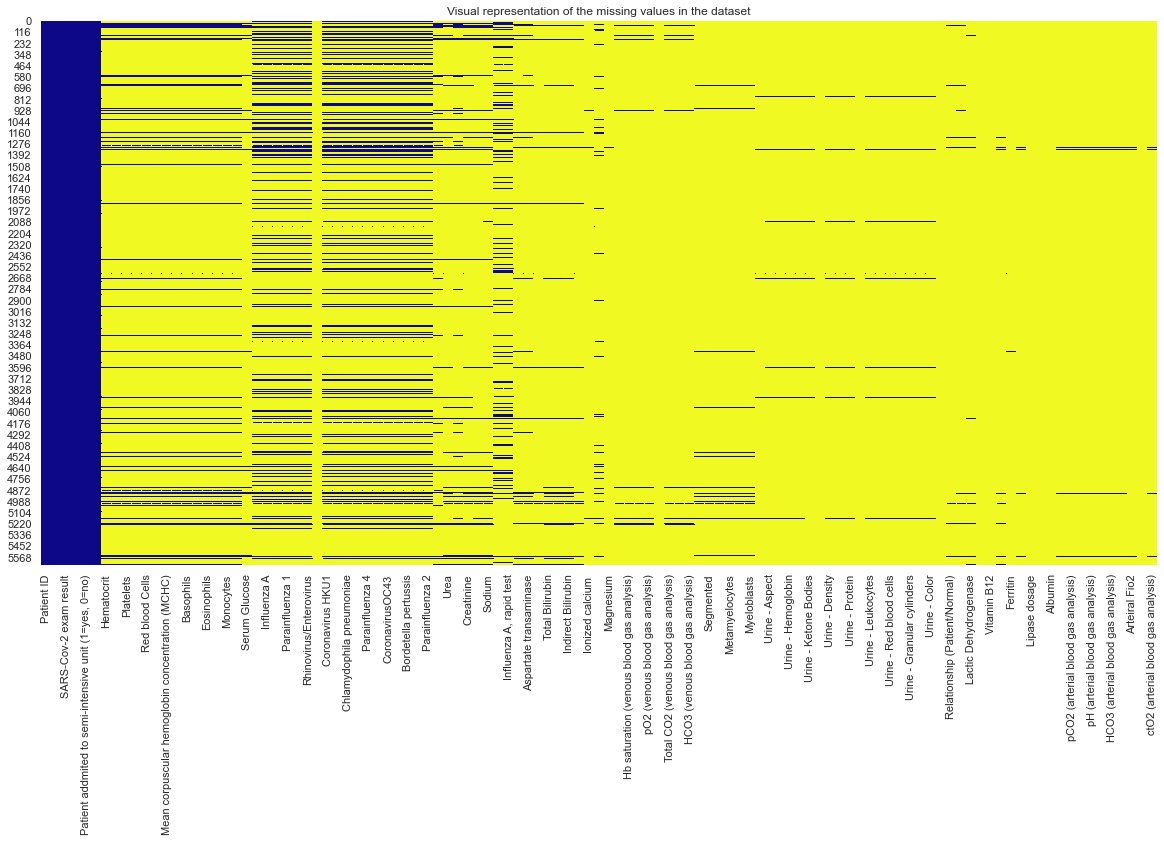

In [56]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False, cmap = 'plasma')
plt.title('Visual representation of the missing values in the dataset')

From this visual presentation of the dataset, we can see that almost the half of the dataset is empty (more than 90% of missing values). However, we can note that there are columns that contains the same amount of missing values. We will keep them for the analysis.

## Dataset cleaning

In [57]:
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]
df = df.drop('Patient ID', axis = 1)
df.shape

(5644, 38)

Text(0.5, 1.0, 'Visual representation of the missing values in the new dataset')

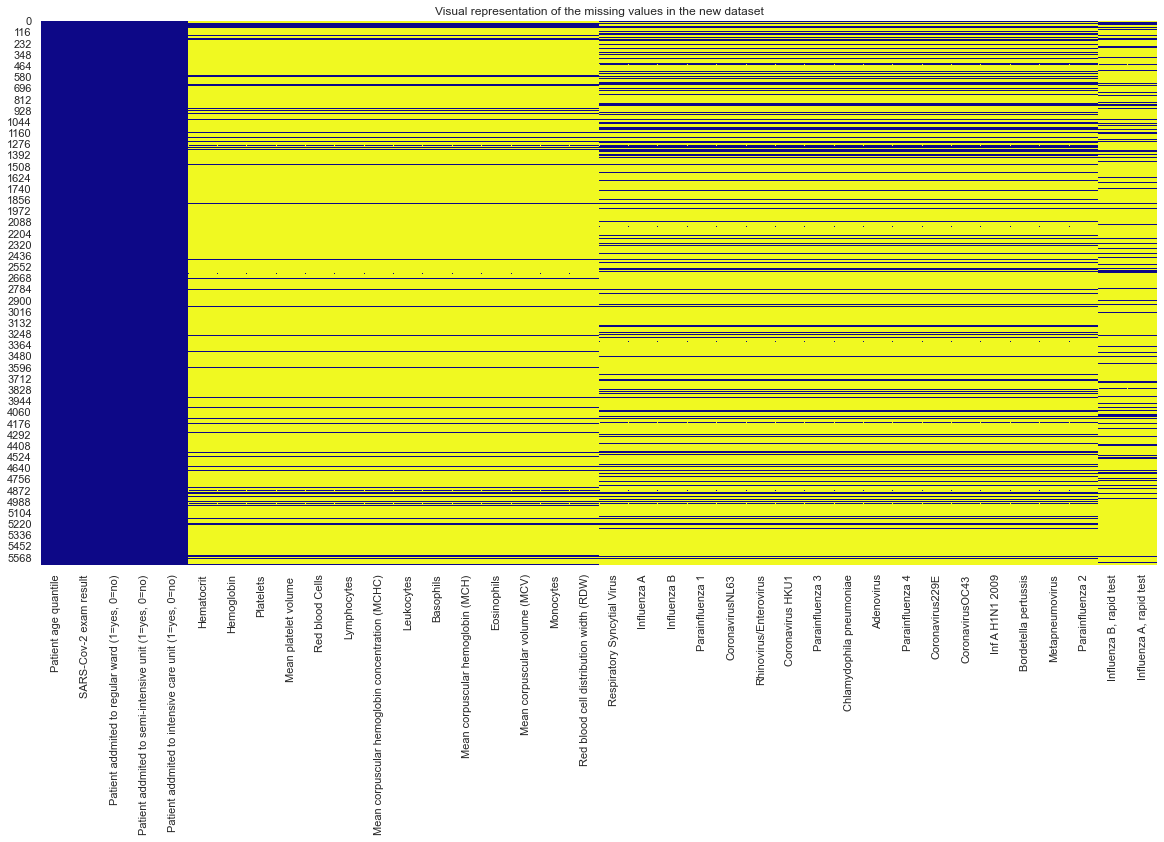

In [58]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False, cmap = 'plasma')
plt.title('Visual representation of the missing values in the new dataset')

## Analysis of the target: SARS-Cov-2 exam result

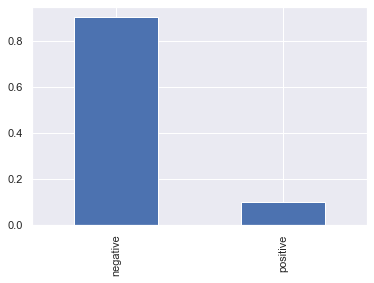

In [59]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True).plot(kind = 'bar')

## Analysis of the features
### Numerical features

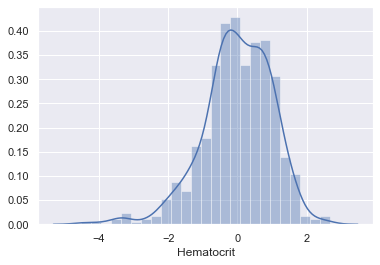

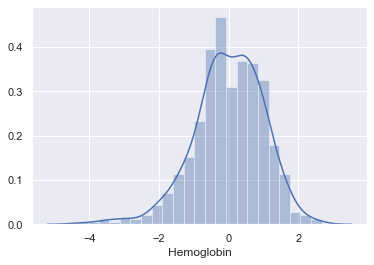

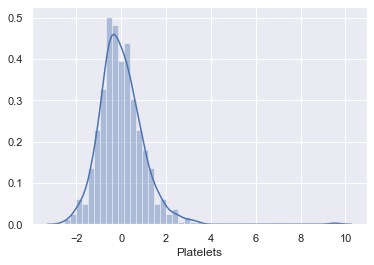

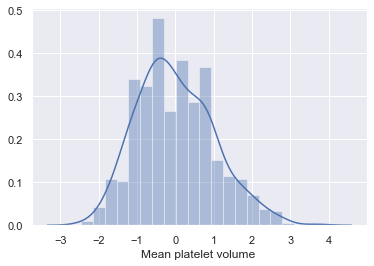

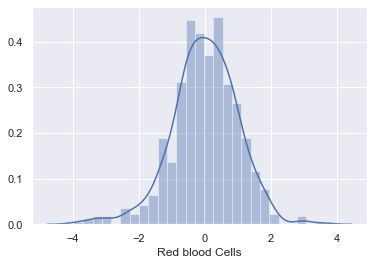

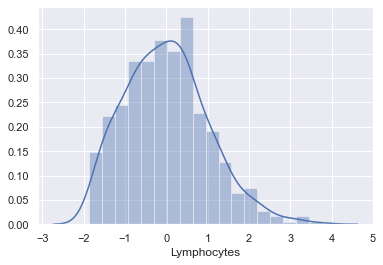

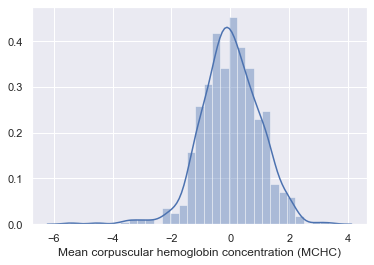

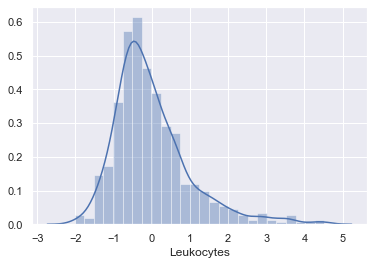

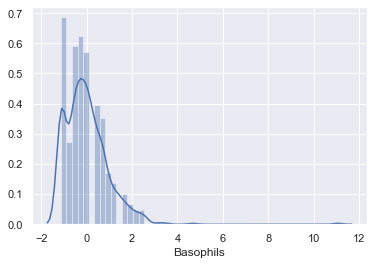

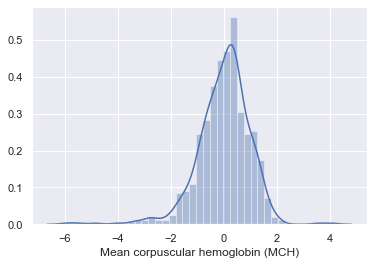

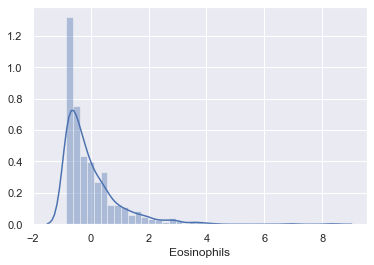

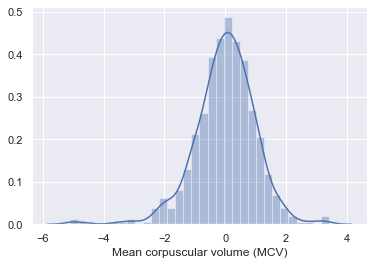

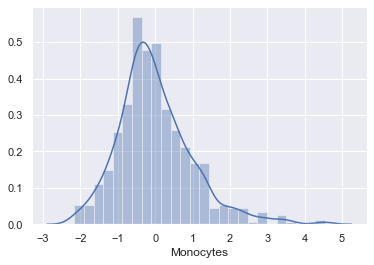

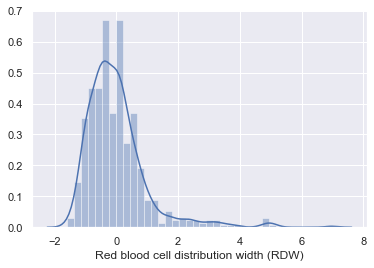

In [60]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

What we can see from these graphs:
- It seems like these features has already been standardized since their mean is 0 and std is 1.
- Some of them have normal distribution
- However, some are not symetric, maybe some outliers.

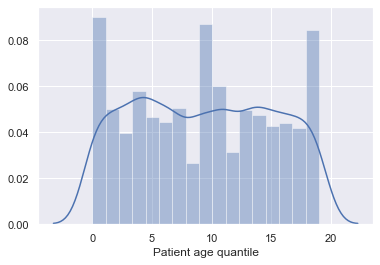

In [61]:
sns.distplot(df['Patient age quantile'])

this is weird representation for the age. Actually, the partients age were maybe splited into classes using a mathematical function. There are no information about this where we found the dataset.

### Categorical features

In [62]:
for col in df.select_dtypes('object'):
    print(f'{col :-<40}, {df[col].unique()}')

SARS-Cov-2 exam result------------------, ['negative' 'positive']
Respiratory Syncytial Virus-------------, [nan 'not_detected' 'detected']
Influenza A-----------------------------, [nan 'not_detected' 'detected']
Influenza B-----------------------------, [nan 'not_detected' 'detected']
Parainfluenza 1-------------------------, [nan 'not_detected' 'detected']
CoronavirusNL63-------------------------, [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus------------------, [nan 'detected' 'not_detected']
Coronavirus HKU1------------------------, [nan 'not_detected' 'detected']
Parainfluenza 3-------------------------, [nan 'not_detected' 'detected']
Chlamydophila pneumoniae----------------, [nan 'not_detected' 'detected']
Adenovirus------------------------------, [nan 'not_detected' 'detected']
Parainfluenza 4-------------------------, [nan 'not_detected' 'detected']
Coronavirus229E-------------------------, [nan 'not_detected' 'detected']
CoronavirusOC43-------------------------, [nan

these are all binary variables "detected" or "not detected" execpt for the column "Parainfluenza 2" that is useless since there are no detected patients in it.

let's now count the number of each of those variables

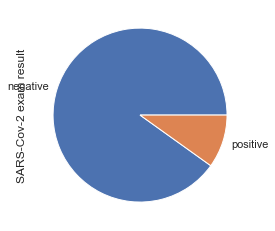

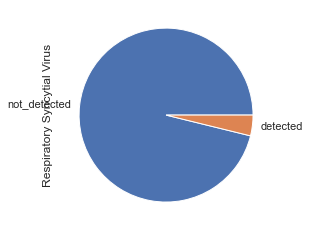

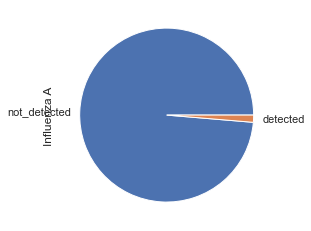

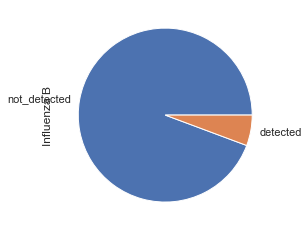

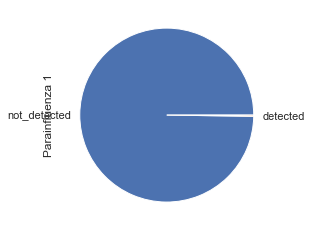

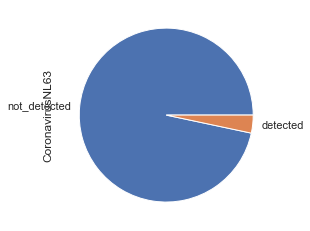

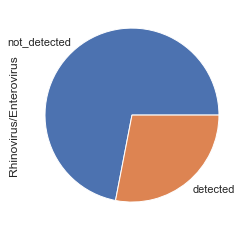

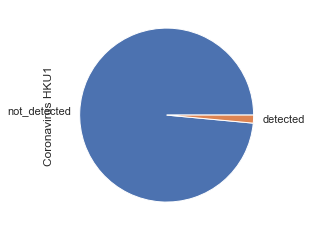

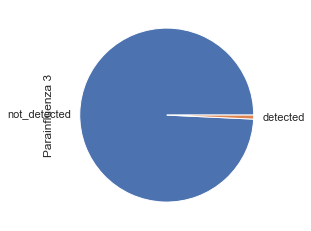

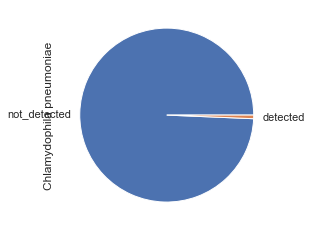

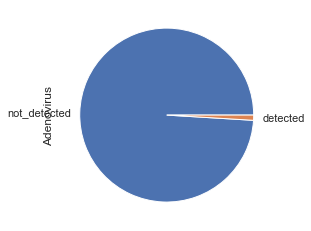

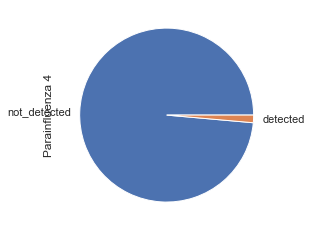

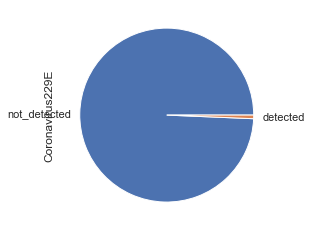

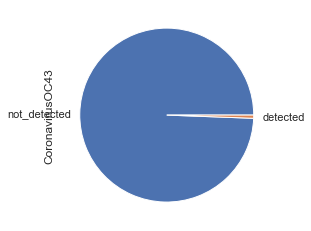

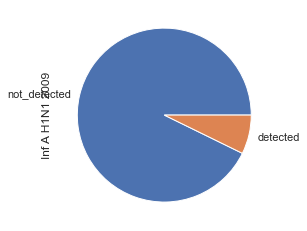

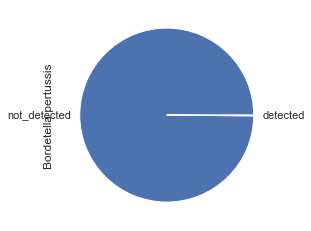

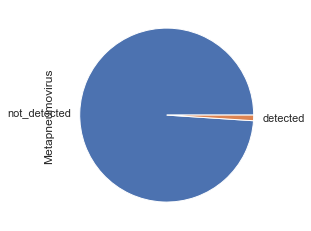

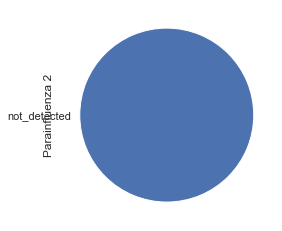

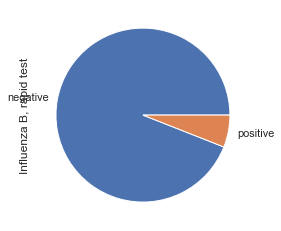

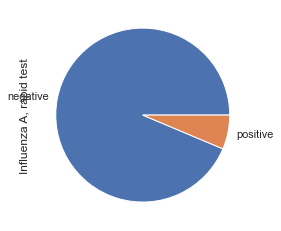

In [63]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot(kind = 'pie')

Ok so most of those columns don't have a high proportion of positives.
## Relation Target /variables
### Creation of dataframes based on target

In [64]:
positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']

### Creation of dataset for blood testing and viral testing
This will be easy to do since the blood testing columns and viral testing columns don't have the same amount of missing values and that we already calculated them.

In [65]:
missing_rate = df.isna().sum()/df.shape[0]
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate > 0.8)]
blood_columns

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

And we get only the blood testing columns here.

In [66]:
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

### Target with regard to Blood

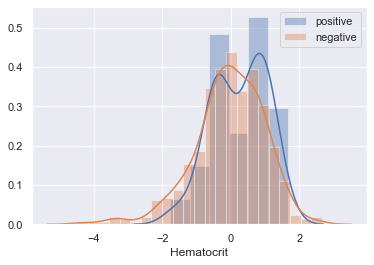

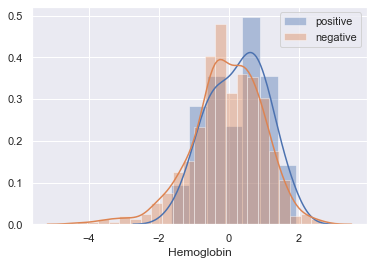

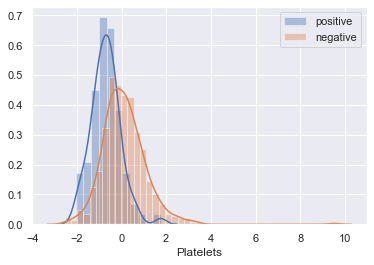

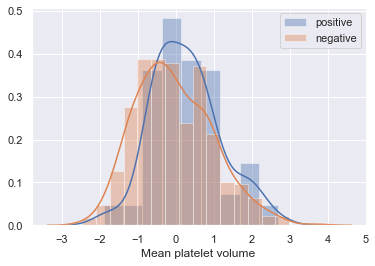

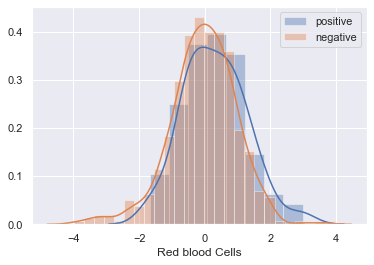

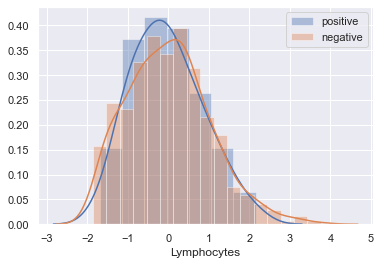

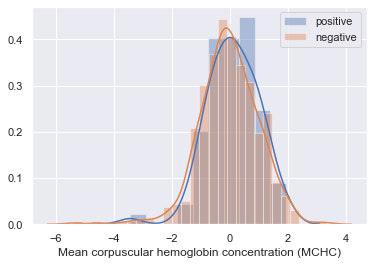

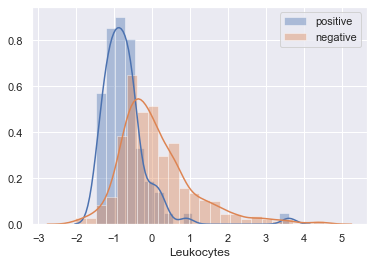

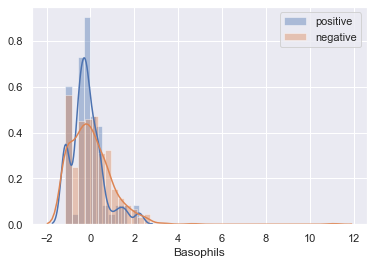

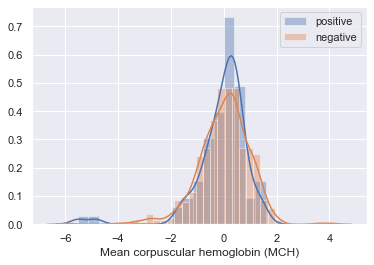

In [67]:
for col in blood_columns[0:10]:
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

From this analysis, we can see that the amount of Monocytes, Platelets, Leukocytes might be linked to Covid_19 --> We need to test this hypothesis

### Target WRT Age

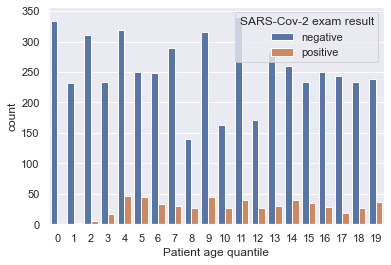

In [68]:
sns.countplot(x = 'Patient age quantile', hue = 'SARS-Cov-2 exam result', data=df)

According to the graph, it seems that the youngest patients won't be tested positive. But:
- We cannot make any assumptions since we don't know how this feature works.
- We know that even young patients can be tested positive.

### Target WRT categorical data (viral testing)

In [69]:
pd.crosstab(df['SARS-Cov-2 exam result'], df['Influenza A'])

Influenza A,detected,not_detected
SARS-Cov-2 exam result,,
negative,18,1224
positive,0,112


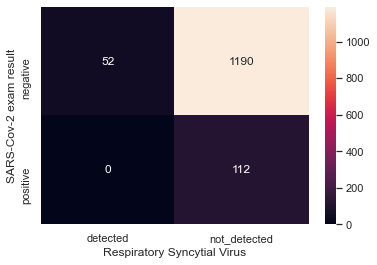

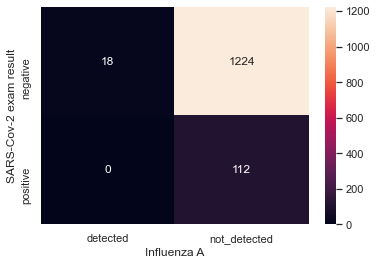

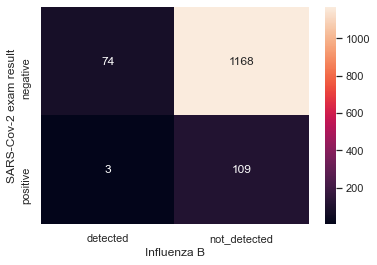

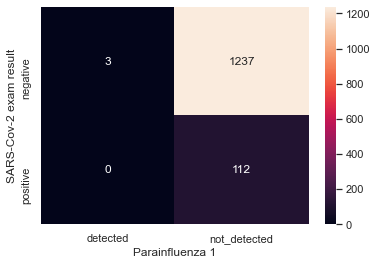

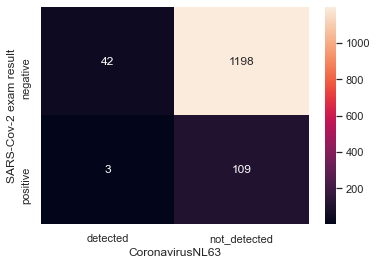

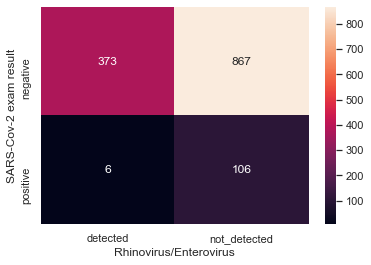

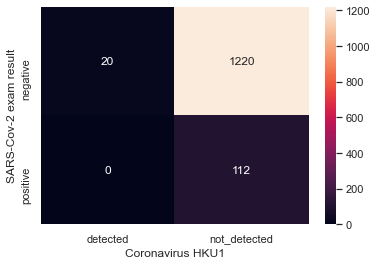

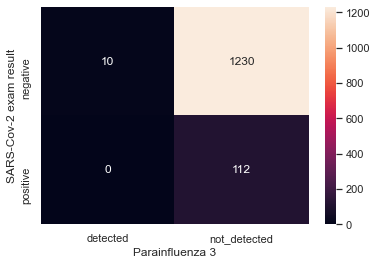

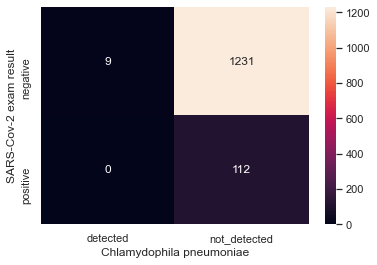

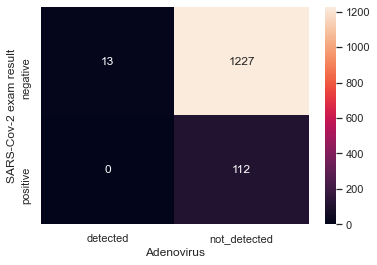

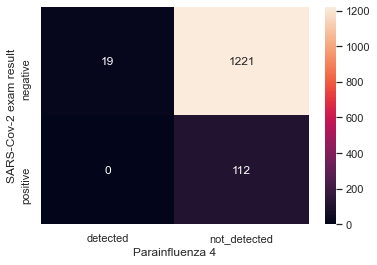

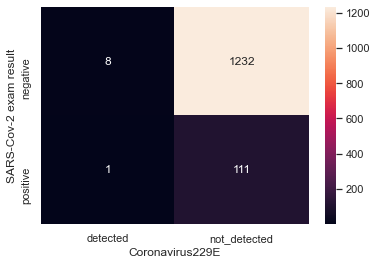

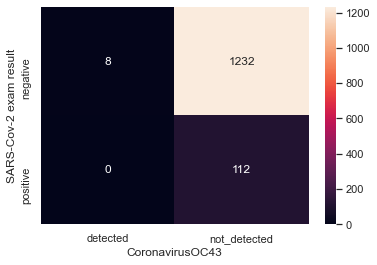

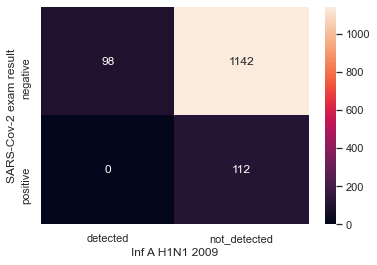

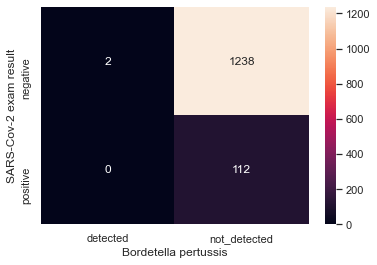

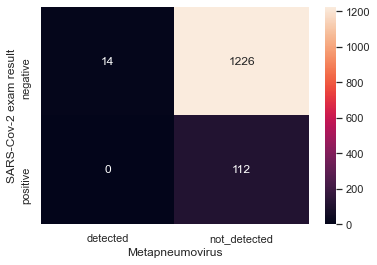

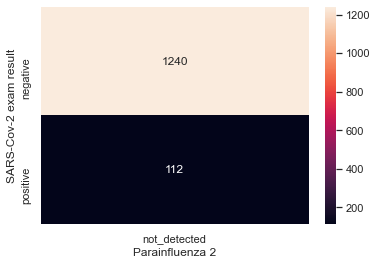

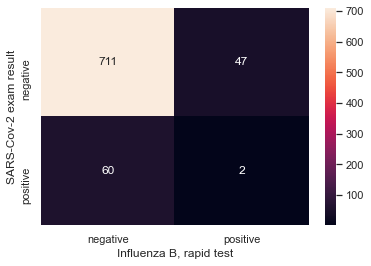

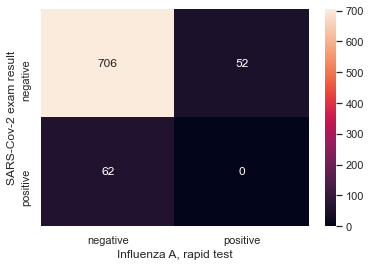

In [70]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot=True, fmt='d')

Here we created a crosstab between the covid and every other virus. We can see that in the vast majority of these tables, very few patients where infected with both the Covid and another virus.
-One have to be carfull, even if in some matrices there are a lot of people infected with two virues (RhinoVirus and Covid) that doesn't mean that because patients have the Rhinovirus they also got sistematically the Covid virus.

## Deeper analysis
### Variable / Variable relation
- blood data / blood data: Some variables are strongly correlated (more than 0.9)
- blood data / age: Almost no correlation.
- viral / viral: Influenza rapid test gives poor results. The test is not that accurate. Might consider todrop this column
- being sick / blood data
- hospitalisation / is sick
- hospitalisation / blood data

### Nan analysis

## Null hypothesis
- People infected with Covid have levels of Leukocytes, Monocytes, Platelets different from healthy patients
- 

### blood data / blood data

In [71]:
df[blood_columns]

,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),"Influenza B, rapid test","Influenza A, rapid test"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,negative,negative
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


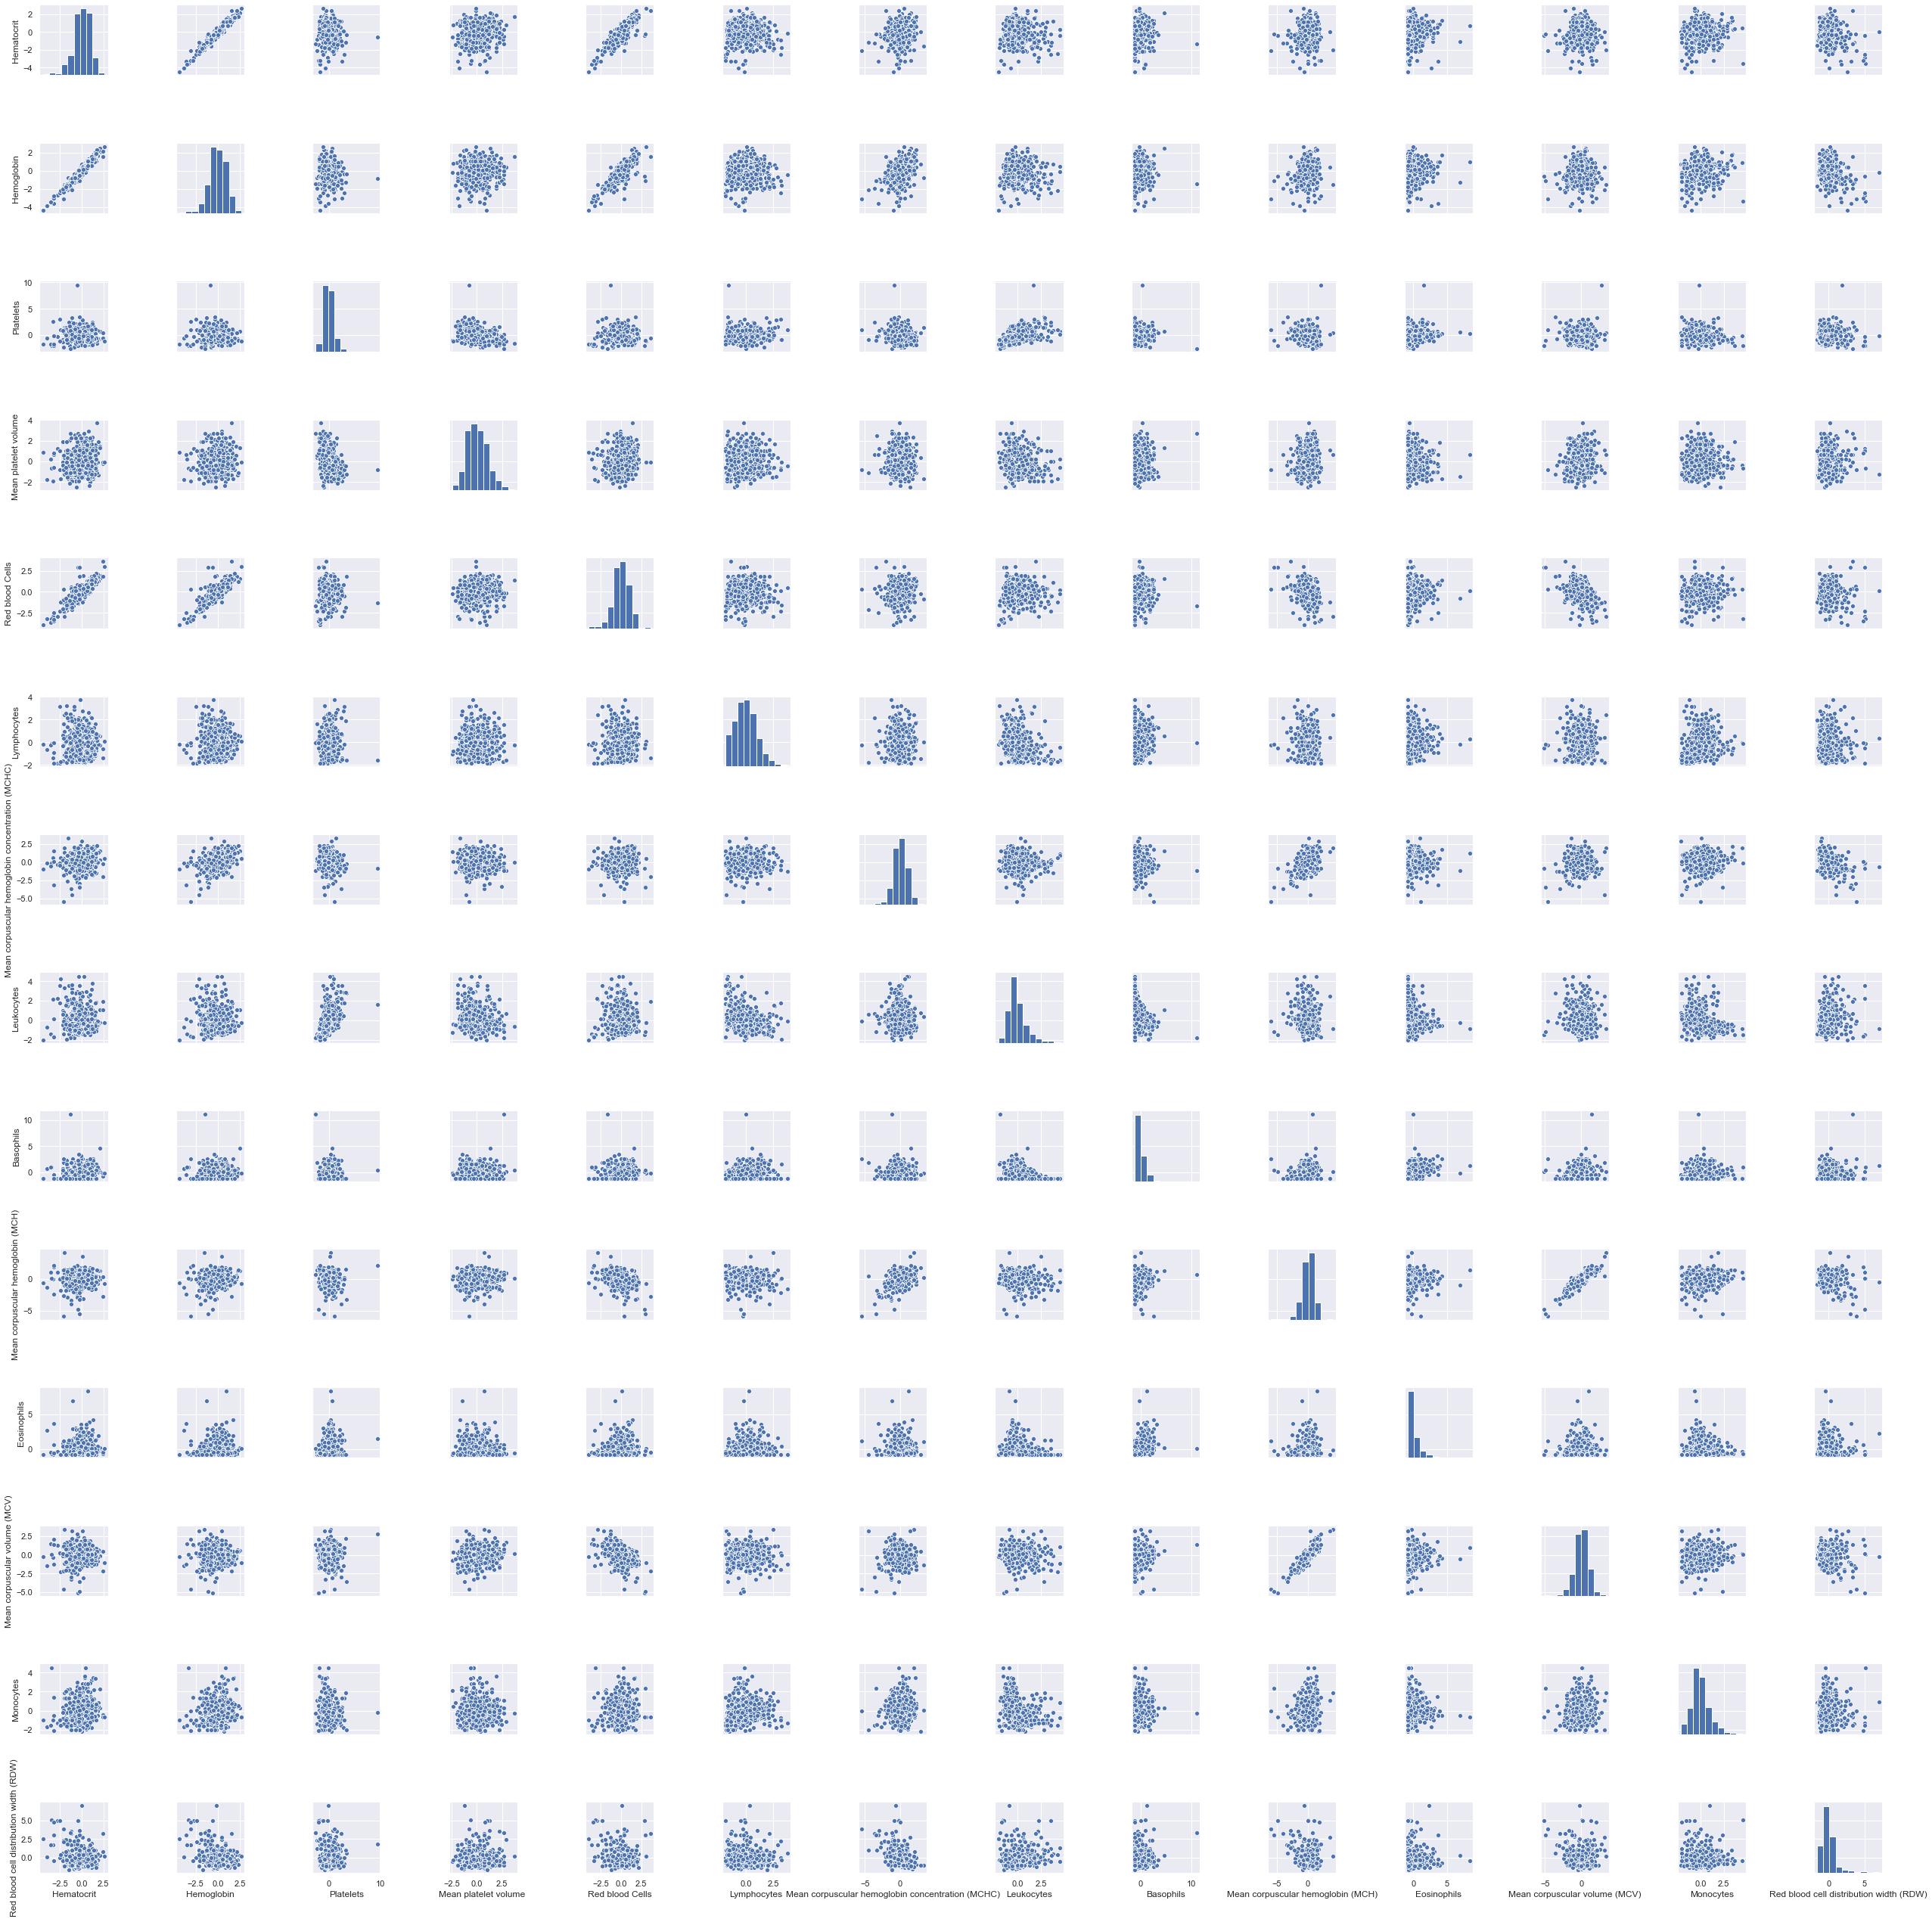

In [72]:
sns.pairplot(df[blood_columns])

This is not the smartest way to analyse the blood columns in the dataset. Another way to do it is to use the correlation function from panda, and to plot it for all variables on a heatmap

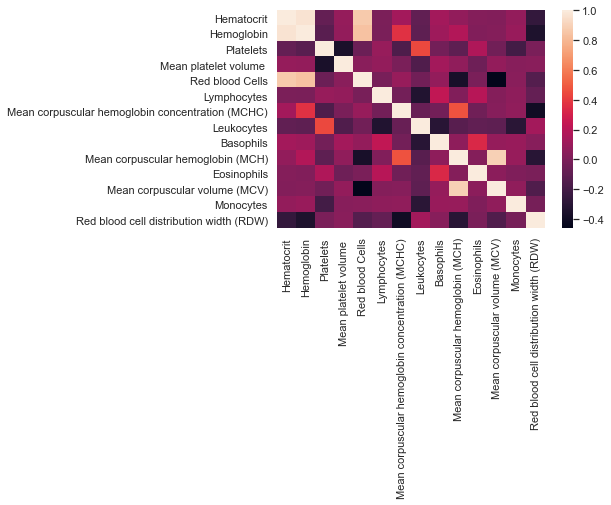

In [73]:
sns.heatmap(df[blood_columns].corr())

### blood data / age

C:\Users\foucardguimax\Desktop\PYTHON\Python3.7\Machine-learnia\Regression\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\foucardguimax\Desktop\PYTHON\Python3.7\Machine-learnia\Regression\lib\site-packages\seaborn\axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
C:\Users\foucardguimax\Desktop\PYTHON\Python3.7\Machine-learnia\Regression\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. F

TypeError: unsupported operand type(s) for +: 'int' and 'str'

<Figure size 432x288 with 0 Axes>

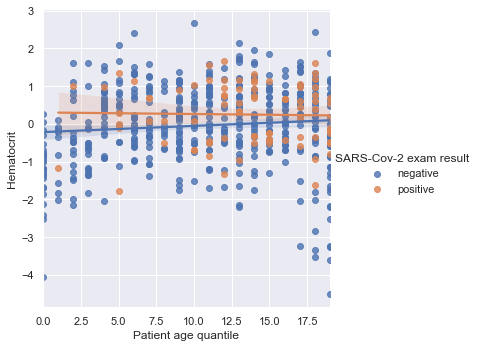

<Figure size 432x288 with 0 Axes>

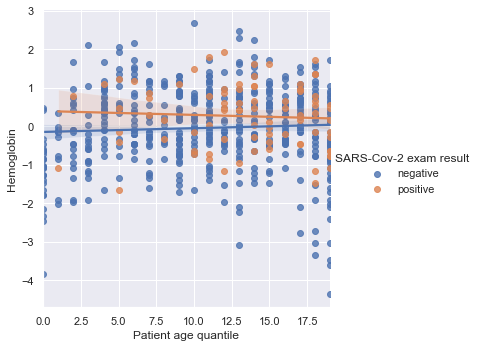

<Figure size 432x288 with 0 Axes>

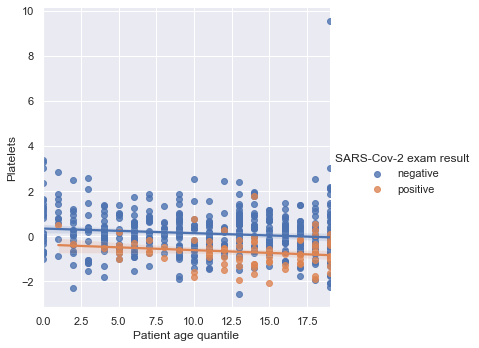

<Figure size 432x288 with 0 Axes>

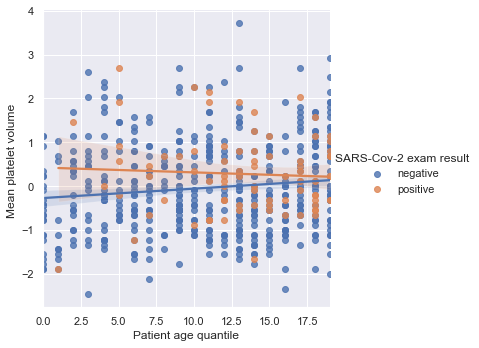

<Figure size 432x288 with 0 Axes>

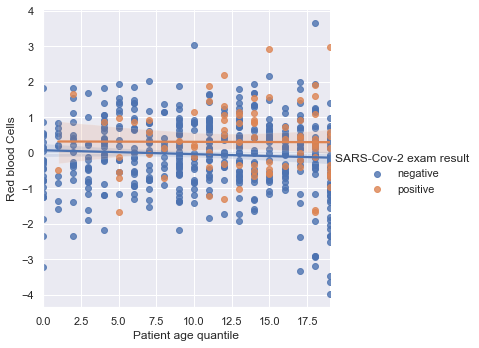

<Figure size 432x288 with 0 Axes>

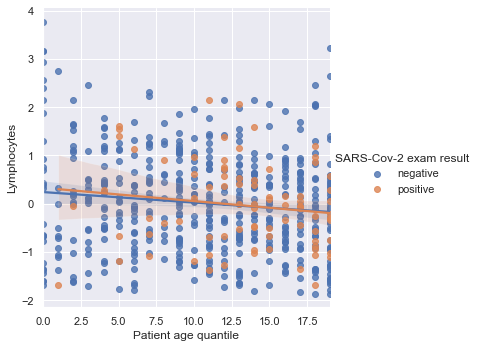

<Figure size 432x288 with 0 Axes>

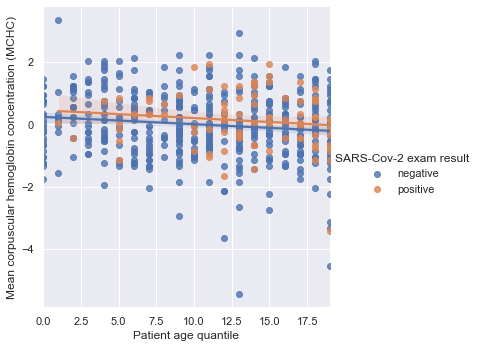

<Figure size 432x288 with 0 Axes>

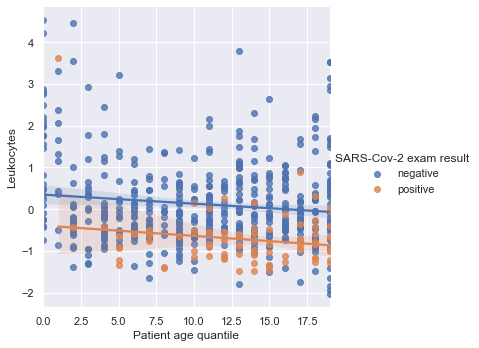

<Figure size 432x288 with 0 Axes>

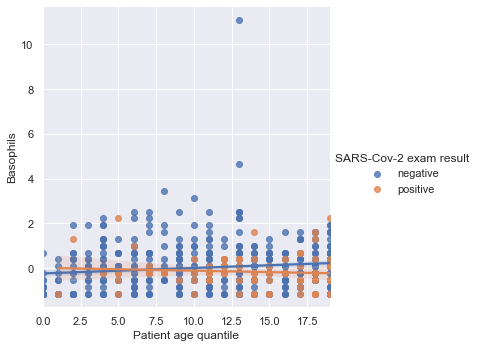

<Figure size 432x288 with 0 Axes>

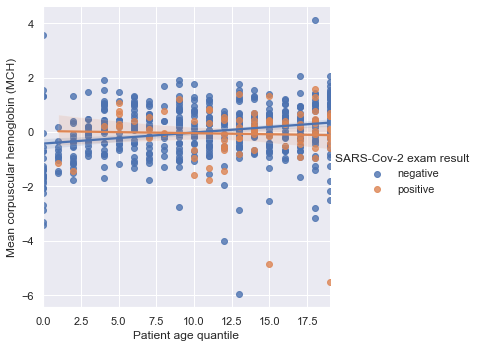

<Figure size 432x288 with 0 Axes>

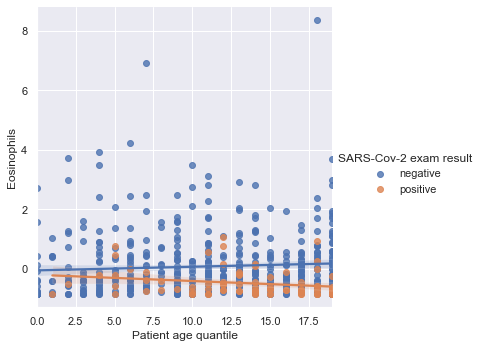

<Figure size 432x288 with 0 Axes>

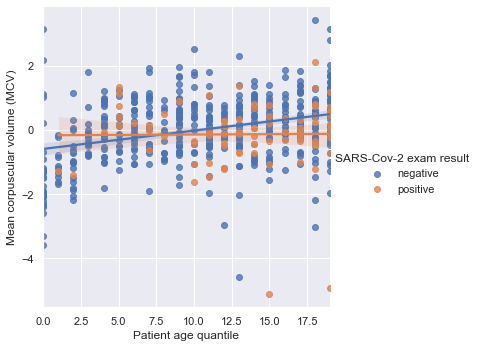

<Figure size 432x288 with 0 Axes>

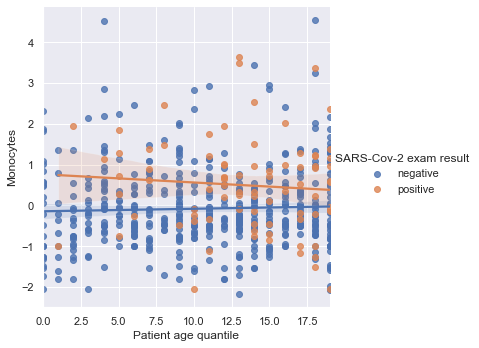

<Figure size 432x288 with 0 Axes>

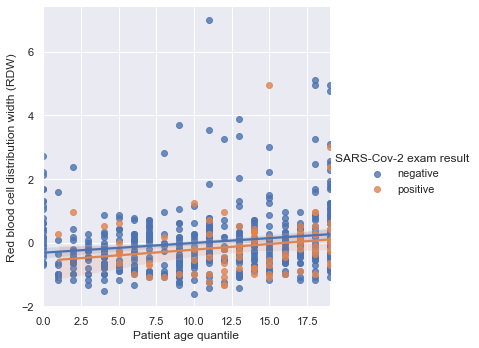

<Figure size 432x288 with 0 Axes>

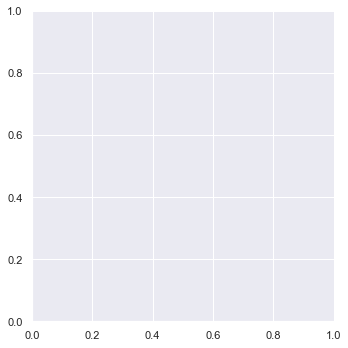

In [74]:
for col in blood_columns:
    plt.figure()
    sns.lmplot(x = 'Patient age quantile', y=col, hue='SARS-Cov-2 exam result', data = df)

With the previous graphs, we can see that there are no clear relation between the age of the patients and the blood informations. Another thing we can do is to directly check at the correlation between the age of the patient and blood information:

In [ ]:
df.corr()['Patient age quantile'].sort_values()

The strongest correlations are not that strong. As a result, we can say that the age of patients, in this dataset, has no impact on the blood information.

### Viral / Viral
#### Relation between Influenza and rapid test

In [ ]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])

In [ ]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])

### being sick / blood data

In [ ]:
df[viral_columns]

In [ ]:
df['test_positive'] = np.sum(df[viral_columns[:-2]] == 'detected', axis =1) >= 1

In [ ]:
is_sick_df = df.loc[df['test_positive'] == True]
not_sick_df = df.loc[df['test_positive'] == False]

In [ ]:
for col in blood_columns[0:10]:
    plt.figure()
    sns.distplot(is_sick_df[col], label ='sick')
    sns.distplot(not_sick_df[col], label='not sick')
    plt.legend()

What is very interesting:
- Blood test levels are differents depending on whether the patient is infected with Covid or other virues (Patelets, lymphocytes)

#### hospitalisation / blood

In [75]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return('regular ward')
    if df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return('semi-intensive ward')
    if df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return('intensive ward')
    else:
        return('unknown')

In [76]:
df['statut'] = df.apply(hospitalisation, axis = 1)

In [77]:
df.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",statut
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative,unknown
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,unknown


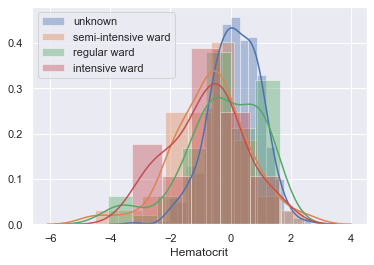

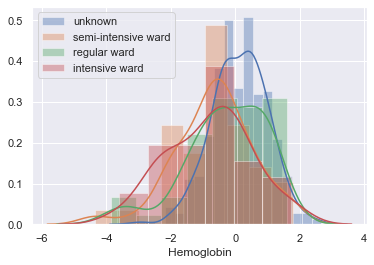

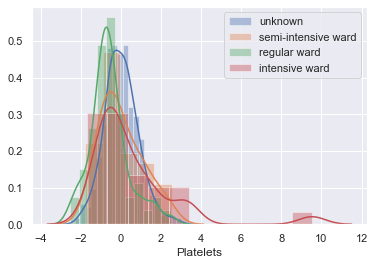

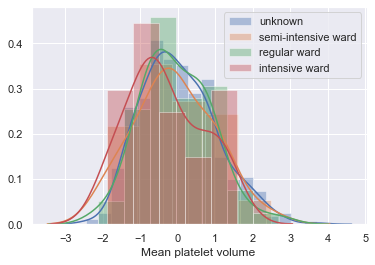

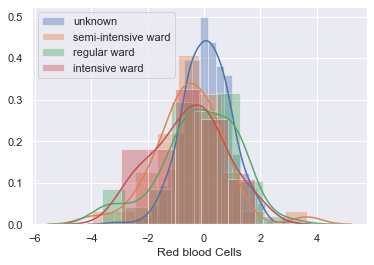

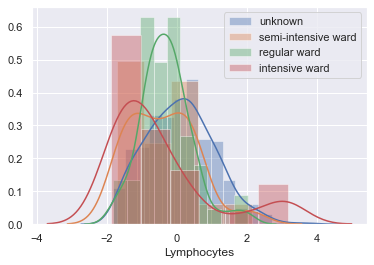

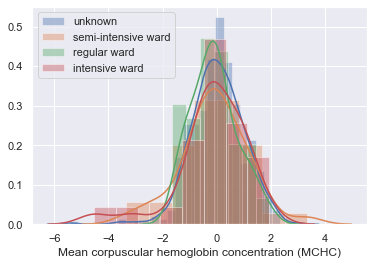

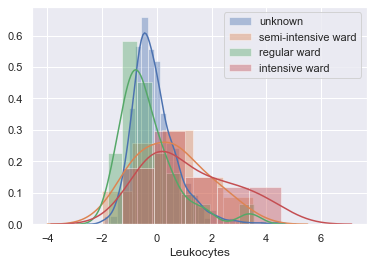

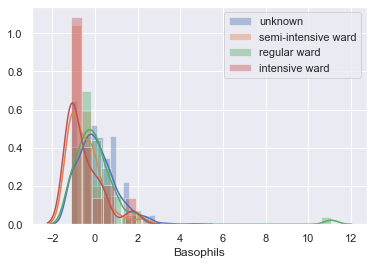

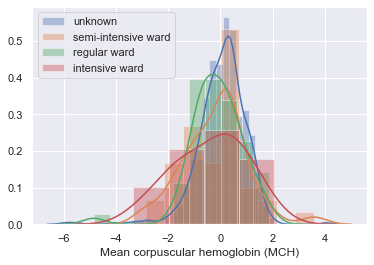

In [80]:
for col in blood_columns[0:10]:
    plt.figure()
    for cat in df['statut'].unique():
        sns.distplot(df[df['statut']==cat][col], label=cat)
    plt.legend()

Interesting because we can see that depending on the ward the patient was addmited to, blood levels are different.
### NaN Analysis
Here we will see what happen if we try to delete some NaN

In [86]:
blood_columns = blood_columns.drop(['Influenza B, rapid test','Influenza A, rapid test'])

In [83]:
viral_columns

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

In [88]:
df.dropna().count()

Patient age quantile                                     99
SARS-Cov-2 exam result                                   99
Patient addmited to regular ward (1=yes, 0=no)           99
Patient addmited to semi-intensive unit (1=yes, 0=no)    99
Patient addmited to intensive care unit (1=yes, 0=no)    99
Hematocrit                                               99
Hemoglobin                                               99
Platelets                                                99
Mean platelet volume                                     99
Red blood Cells                                          99
Lymphocytes                                              99
Mean corpuscular hemoglobin concentration (MCHC)         99
Leukocytes                                               99
Basophils                                                99
Mean corpuscular hemoglobin (MCH)                        99
Eosinophils                                              99
Mean corpuscular volume (MCV)           

Here we see that if we drop all the rows that contain missing values, only 99 rows are left. We had more than 5000 at the begining.
As a result, we might need to fill some NaN if we want to work with both the blood and viral columns.

In [89]:
df[blood_columns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [90]:
df[viral_columns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

Another important thing to check at is what happen for the target if we decide to remove all the NaN from the previous blood and viral columns. Do we still get a good proportion of positve/negative or not ?

In [92]:
df1 = df[viral_columns[:-2]]
df1['covid'] = df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

C:\Users\foucardguimax\Desktop\PYTHON\Python3.7\Machine-learnia\Regression\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


negative    0.91716
positive    0.08284
Name: covid, dtype: float64

The proportion still looks the same for the viral columns

In [93]:
df1 = df[blood_columns]
df1['covid'] = df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

C:\Users\foucardguimax\Desktop\PYTHON\Python3.7\Machine-learnia\Regression\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


negative    0.864548
positive    0.135452
Name: covid, dtype: float64

And here we get something a bit better

### Null hypothesis
Time to check some assumptions we made earlier:
- Patients infected with covid have differents levels of Leukocytes, Monocytes and Platelets from healthy patients
    - H0: Mean levels are equal on both positive and negative pateients
- Patients infected with other virues also have differents levels.

To test these hypothesis, we will make statistical tests. Here a Student test. (Is the mean between two distribution different ?) The Student test will try to reject our null hypothesis.

In [94]:
from scipy.stats import ttest_ind

In [96]:
positive_df.shape

(558, 38)

In [98]:
negative_df.shape

(5086, 38)

In [100]:
balanced_ned = negative_df.sample(positive_df.shape[0])
balanced_ned

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
1596,11,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2430,14,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
756,14,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
97,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5398,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,0,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
2017,7,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1415,3,negative,0,0,0,1.014726,1.042812,-1.208313,0.796029,1.001153,-0.52601,0.343725,-1.302342,-0.223767,-0.083183,-0.456253,-0.234399,0.515126,0.082579,not_detected,not_detected,detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
1209,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_ned[col].dropna(), positive_df[col].dropna())
    if p < alpha:
        return('H0 rejected')
    else:
        return(0)

In [108]:
for col in blood_columns:
    print(f'{col :-<50} {t_test(col)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- H0 rejected
Mean platelet volume ----------------------------- 0
Red blood Cells----------------------------------- H0 rejected
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 rejected
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 rejected
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- H0 rejected
Red blood cell distribution width (RDW)----------- 0
